# Parametric Blackholes

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from unyt import Msun, yr, Angstrom, deg, K

from synthesizer.dust.attenuation import PowerLaw
from synthesizer.dust.emission import Greybody
from synthesizer.blackholes import UnifiedAGN
from synthesizer.parametric import BlackHoles

# Set a random number seed to ensure consistent results
np.random.seed(42)

First we need to initialise our blackhole object.

In [2]:
blackhole = BlackHoles(mass=1E8*Msun, inclination=15*deg, accretion_rate=1.*Msun/yr, metallicity=0.01)

Like other `synthesizer` objects we can get more information using the `print` command.

In [3]:
print(blackhole)

--------------------------------------------------------------------------------
                                SUMMARY OF BLACKHOLE                                
Number of blackholes: 1 
mass: 100000000.0 
accretion_rate: 1.0 
accretion_rate_eddington: 0.451 
bolometric_luminosity: 5.662975168128828e+45 
eddington_ratio: 0.451 
bb_temperature: 224000.0 
eddington_luminosity: 1.2570000000000002e+46 
epsilon: 0.1 
inclination: 15 
cosine_inclination: 0.966 



### Generating spectral energy distribution

We can generate spectra by passing a BlacHoleEmissionModel, e.g. the UnifiedAGN model described in emission_models.

/opt/hostedtoolcache/Python/3.10.13/x64/lib/python3.10/site-packages/unyt/array.py:1813: RuntimeWarning: overflow encountered in exp
  out_arr = func(np.asarray(inp), out=out_func, **kwargs)
/opt/hostedtoolcache/Python/3.10.13/x64/lib/python3.10/site-packages/unyt/array.py:1813: RuntimeWarning: divide by zero encountered in log10
  out_arr = func(np.asarray(inp), out=out_func, **kwargs)


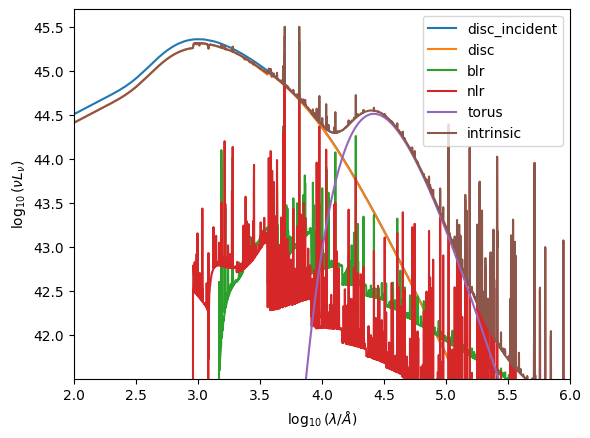

In [4]:

# define the emission model
grid_dir = '../../../tests/test_grid/'
emission_model = UnifiedAGN(disc_model='test_grid_agn', photoionisation_model='', grid_dir=grid_dir)

# get the spectra assuming this emission model
spectra = blackhole.get_spectra(emission_model)

# plot the spectra
for id in ['disc_incident', 'disc', 'blr', 'nlr', 'torus', 'intrinsic']:
    sed = spectra[id]
    plt.plot(np.log10(sed.lam), np.log10(sed.luminosity), label = id)

plt.xlim([2,6])
plt.ylim(np.max(np.log10(spectra['intrinsic'].luminosity))-4, np.max(np.log10(spectra['intrinsic'].luminosity))+0.2)
plt.xlabel(r'$\log_{10}(\lambda/\AA)$')
plt.ylabel(r'$\log_{10}(\nu L_{\nu})$')
plt.legend()
plt.show()

We can also include diffuse dust along the line of sight if we're interested:

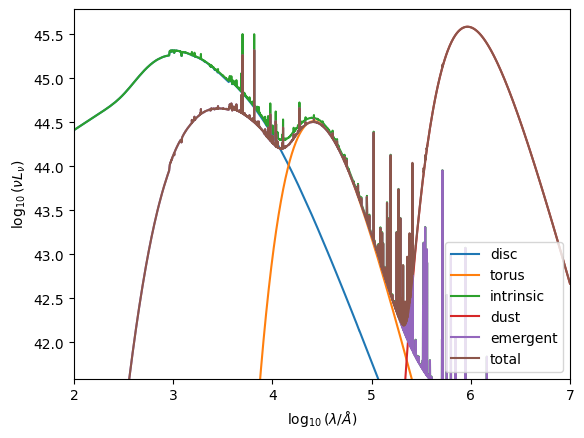

In [5]:
tau_v = 0.5
dust_curve = PowerLaw(slope=-1.)
dust_emission_model = Greybody(30*K,1.2)

# get the spectra assuming this emission model
spectra = blackhole.get_spectra(emission_model, tau_v=tau_v, dust_curve=dust_curve, dust_emission_model=dust_emission_model)

# plot the spectra
for id in ['disc', 'torus', 'intrinsic', 'dust', 'emergent', 'total']:
    sed = spectra[id]
    plt.plot(np.log10(sed.lam), np.log10(sed.luminosity), label = id)

plt.xlim([2,7])
plt.ylim(np.max(np.log10(spectra['total'].luminosity))-4, np.max(np.log10(spectra['total'].luminosity))+0.2)
plt.xlabel(r'$\log_{10}(\lambda/\AA)$')
plt.ylabel(r'$\log_{10}(\nu L_{\nu})$')
plt.legend()
plt.show()